In [37]:

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 200)

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

# Define the list of subject names
subjects = ['DY', 'BK']
subjects = ['BK']
# Initialize an empty dictionary to store DataFrames for each subject
merged_dataframes = {}

combined_dataframe = pd.DataFrame(columns=['Subject', 'Response', 'Spreadsheet: Audio1', 'Spreadsheet: Audio2'])
# Loop through each subject
for subject in subjects:
    # Load the CSV file for the current subject
    data = pd.read_csv(f'{subject}-data-task-1.csv')
    # Filter rows where "Object Name" is equal to "Slider"
    slider_rows_data = data[data['Object Name'] == 'Slider']
    # Extract the desired columns
    response_column_data = slider_rows_data['Response']
    audio1_column_data = slider_rows_data['Spreadsheet: Audio1'].str[:-13]
    audio2_column_data = slider_rows_data['Spreadsheet: Audio2'].str[:-13]
    # Create a new DataFrame with the extracted columns
    new_dataframe_data = pd.DataFrame({
        'Response': response_column_data,
        'Spreadsheet: Audio1': audio1_column_data,
        'Spreadsheet: Audio2': audio2_column_data,
        'Subject' : subject
    })
    new_dataframe_data['Response'] = pd.to_numeric(new_dataframe_data['Response'], errors='coerce')
    # Remove the last 13 characters from the 'Spreadsheet: Audio1' column
#     new_dataframe_data['Spreadsheet: Audio1'] = new_dataframe_data['Spreadsheet: Audio1'].str[:-13]
#     new_dataframe_data['Spreadsheet: Audio2'] = new_dataframe_data['Spreadsheet: Audio2'].str[:-13]
    # Convert the "Response" column to numeric

    ## Load the CSV file for the current subject
    data2 = pd.read_csv(f'{subject}-data-task-2.csv')
    # Filter rows where "Object Name" is equal to "Slider"
    slider_rows_data2 = data2[data2['Object Name'] == 'Slider']
    # Extract the desired columns
    response_column_data2 = slider_rows_data2['Response']
    audio1_column_data2 = slider_rows_data2['Spreadsheet: Audio1'].str[:-13]
    audio2_column_data2 = slider_rows_data2['Spreadsheet: Audio2'].str[:-13]

    # Create a new DataFrame with the extracted columns
    new_dataframe_data2 = pd.DataFrame({
        'Response': response_column_data2,
        'Spreadsheet: Audio1': audio1_column_data2,
        'Spreadsheet: Audio2': audio2_column_data2,
        'Subject' : subject
    })
    new_dataframe_data2['Response'] = pd.to_numeric(new_dataframe_data2['Response'], errors='coerce')
    # Remove the last 13 characters from the 'Spreadsheet: Audio1' column
#     new_dataframe_data2['Spreadsheet: Audio1'] = new_dataframe_data2['Spreadsheet: Audio1'].str[:-13]
#     new_dataframe_data2['Spreadsheet: Audio2'] = new_dataframe_data2['Spreadsheet: Audio2'].str[:-13]
        # Convert the "Response" column to numeric

    # Merge the two DataFrames
    merged_dataframe = pd.concat([new_dataframe_data, new_dataframe_data2], ignore_index=True)
    
    # Store the DataFrame for the current subject in the dictionary
    combined_dataframe = pd.concat([combined_dataframe, merged_dataframe], ignore_index=True)
    
# Extract unique names and remove the last 13 characters
unique_file_names = merged_dataframe['Spreadsheet: Audio1'].unique()
unique_file_names2 = merged_dataframe['Spreadsheet: Audio2'].unique()
# Concatenate and convert to a numpy array
merged_filenames = np.concatenate((unique_file_names, unique_file_names2), axis=None)
# Find the unique names using numpy
unique_names = np.unique(merged_filenames)
print(unique_names, len(unique_names))

# Create a mapping dictionary from unique names to integers
name_to_integer_mapping = {name: index for index, name in enumerate(unique_names)}

# Replace the names in the DataFrame with integers
combined_dataframe['Spreadsheet: Audio1'] = combined_dataframe['Spreadsheet: Audio1'].replace(name_to_integer_mapping)
combined_dataframe['Spreadsheet: Audio2'] = combined_dataframe['Spreadsheet: Audio2'].replace(name_to_integer_mapping)

# Print the updated DataFrames for each subject
combined_dataframe.head(5000)


['NC-off_SNR0_F-M' 'NC-off_SNR0_F-S' 'NC-off_SNR0_S-MS' 'NC-off_SNR10_F-M'
 'NC-off_SNR10_F-S' 'NC-off_SNR10_S-MS' 'NC-on_SNR0_F-M' 'NC-on_SNR0_F-S'
 'NC-on_SNR0_S-MS' 'NC-on_SNR10_F-M' 'NC-on_SNR10_F-S' 'NC-on_SNR10_S-MS'] 12


,Subject,Response,Spreadsheet: Audio1,Spreadsheet: Audio2
0,BK,59,0,1
1,BK,24,0,2
2,BK,51,0,3
3,BK,79,0,4
4,BK,79,0,5
...,...,...,...,...
127,BK,9,8,10
128,BK,18,8,11
129,BK,21,9,10
130,BK,31,9,11


In [171]:

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Subject'])

# Iterate over unique subjects
for subject in subjects:
    subject_data = combined_dataframe[combined_dataframe['Subject'] == subject]
    
    unique_combinations = subject_data[['Spreadsheet: Audio1', 'Spreadsheet: Audio2']].drop_duplicates()

    # Iterate over unique combinations of 'Spreadsheet: Audio1' and 'Spreadsheet: Audio2'
    for index, row in unique_combinations.iterrows():
        audio1 = row['Spreadsheet: Audio1']
        audio2 = row['Spreadsheet: Audio2']
        
        # Find rows with the same combination of 'Spreadsheet: Audio1' and 'Spreadsheet: Audio2'
        matching_rows = subject_data[(subject_data['Spreadsheet: Audio1'] == audio1) & (subject_data['Spreadsheet: Audio2'] == audio2)]
        
        if len(matching_rows) == 2:  # Check if there are exactly two matching rows
            # Calculate the difference between the first and second 'Response' values
            response_difference = matching_rows.iloc[0]['Response'] - matching_rows.iloc[1]['Response']
            
            # Store the result in a new column named after the combination
            column_name = f'Audio{audio1}_Audio{audio2}_Diff'
            results_df.at[subject, column_name] = response_difference
        else:
            print('error')

# Reset the index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Add the 'Subject' column to the results DataFrame
results_df['Subject'] = subjects

# Display the results
results_df.head(66)


,Subject,Audio0_Audio1_Diff,Audio0_Audio2_Diff,Audio0_Audio3_Diff,Audio0_Audio4_Diff,Audio0_Audio5_Diff,Audio0_Audio6_Diff,Audio0_Audio7_Diff,Audio0_Audio8_Diff,Audio0_Audio9_Diff,...,Audio7_Audio8_Diff,Audio7_Audio9_Diff,Audio7_Audio10_Diff,Audio7_Audio11_Diff,Audio8_Audio9_Diff,Audio8_Audio10_Diff,Audio8_Audio11_Diff,Audio9_Audio10_Diff,Audio9_Audio11_Diff,Audio10_Audio11_Diff
0,DY,27.0,6.0,-6.0,6.0,-16.0,-6.0,28.0,5.0,-5.0,...,5.0,-13.0,-18.0,1.0,-6.0,7.0,-4.0,-24.0,6.0,43.0
1,BK,-17.0,-29.0,-10.0,-7.0,-10.0,0.0,31.0,31.0,13.0,...,-8.0,15.0,-1.0,10.0,-18.0,32.0,-2.0,11.0,-5.0,-5.0


[['DY' 27.0 6.0 -6.0 6.0 -16.0 -6.0 28.0 5.0 -5.0 -1.0 -8.0 -48.0 -15.0
  -35.0 -25.0 10.0 3.0 -40.0 -26.0 -7.0 4.0 -38.0 -37.0 -73.0 -11.0 -18.0
  -35.0 -19.0 -12.0 13.0 -15.0 -31.0 -3.0 16.0 10.0 -37.0 -20.0 -24.0 2.0
  -1.0 -1.0 5.0 -23.0 36.0 -4.0 -51.0 -24.0 -11.0 4.0 -4.0 -22.0 -56.0
  -30.0 -3.0 0.0 22.0 5.0 -13.0 -18.0 1.0 -6.0 7.0 -4.0 -24.0 6.0 43.0]]


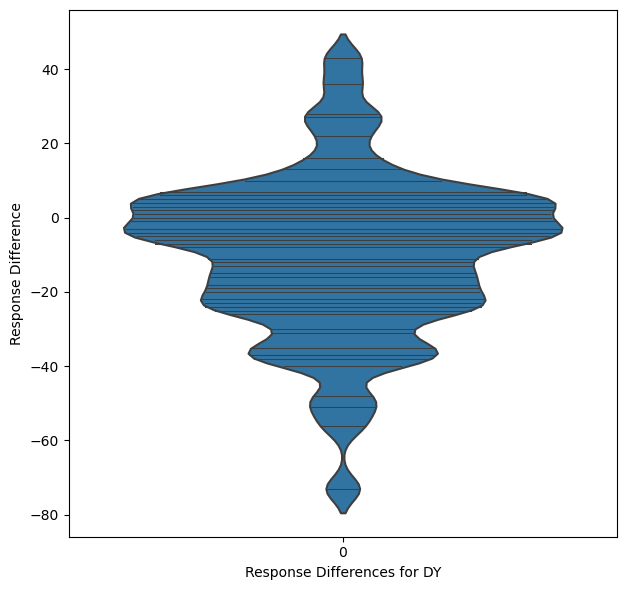

In [165]:

# Create a violin plot for each subject
plt.figure(figsize=(12, 6))

for subject in subjects:
    subject_data = results_df[results_df['Subject'] == subject].values
    print(subject_data)
    
    plt.subplot(1, 2, subjects.index(subject) + 1)  # Create subplots for each subject
    sns.violinplot(data=subject_data[0,1:], inner='stick',bw=0.15,)
    
    plt.xlabel(f'Response Differences for {subject}')
    plt.ylabel('Response Difference')


plt.tight_layout()

plt.show()


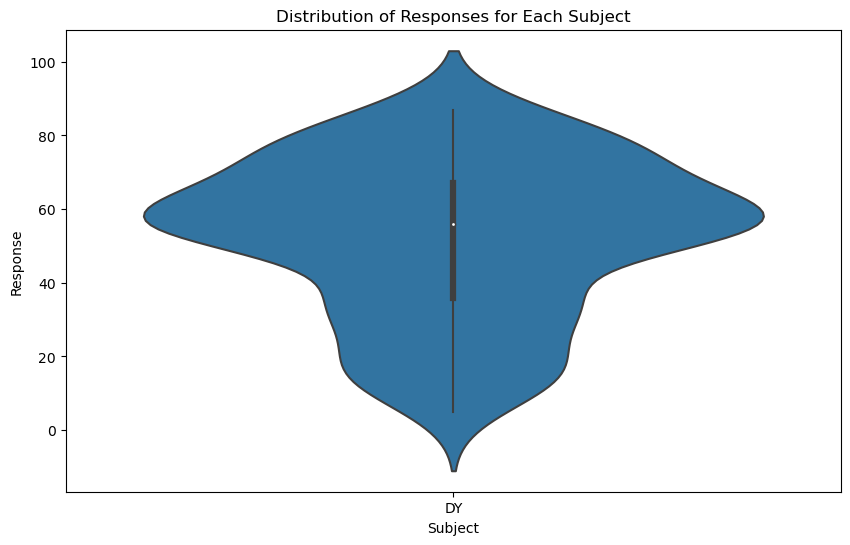

In [166]:

# ... (previous code)

# Convert 'Response' column to numeric (with errors='coerce' to handle non-numeric values)
combined_dataframe['Response'] = pd.to_numeric(combined_dataframe['Response'], errors='coerce')

# Create a violin plot
plt.figure(figsize=(10, 6))

# Use Seaborn to create the violin plot
sns.violinplot(x='Subject', y='Response', data=combined_dataframe)

# Set plot labels and title
plt.xlabel('Subject')
plt.ylabel('Response')
plt.title('Distribution of Responses for Each Subject')

# Show the plot
plt.show()


In [13]:

# Initialize the distance matrix as a zeros matrix
D = np.zeros((12, 12))

# Iterate through the rows of the DataFrame
for index, row in combined_dataframe.iterrows():
    x = int(row['Spreadsheet: Audio1'])
    y = int(row['Spreadsheet: Audio2'])
    distance = int(row['Response'])/90
 
    # Update the distance matrix
    D[x, y] = D[x, y] + distance
    D[y, x] = D[y, x] + distance

print("normalize with", len(combined_dataframe))
# Normalize the distance matrix
D /= len(combined_dataframe)

# Now, 'D' is your distance matrix in Python.
print(D)


normalize with 132
[[0.         0.01136364 0.00648148 0.00942761 0.01388889 0.01414141
  0.01195286 0.01254209 0.00850168 0.00850168 0.01313131 0.01279461]
 [0.01136364 0.         0.00294613 0.01018519 0.00210438 0.00816498
  0.01220539 0.01153199 0.00656566 0.01119529 0.01254209 0.01422559]
 [0.00648148 0.00294613 0.         0.01077441 0.00707071 0.00159933
  0.01186869 0.00993266 0.00345118 0.01170034 0.01043771 0.00589226]
 [0.00942761 0.01018519 0.01077441 0.         0.00698653 0.0030303
  0.00723906 0.00942761 0.00479798 0.00050505 0.00816498 0.00252525]
 [0.01388889 0.00210438 0.00707071 0.00698653 0.         0.0016835
  0.00892256 0.01077441 0.00673401 0.01026936 0.00656566 0.0026936 ]
 [0.01414141 0.00816498 0.00159933 0.0030303  0.0016835  0.
  0.01161616 0.01329966 0.00816498 0.00530303 0.00606061 0.00176768]
 [0.01195286 0.01220539 0.01186869 0.00723906 0.00892256 0.01161616
  0.         0.00707071 0.00799663 0.00572391 0.01161616 0.01372054]
 [0.01254209 0.01153199 0.009932

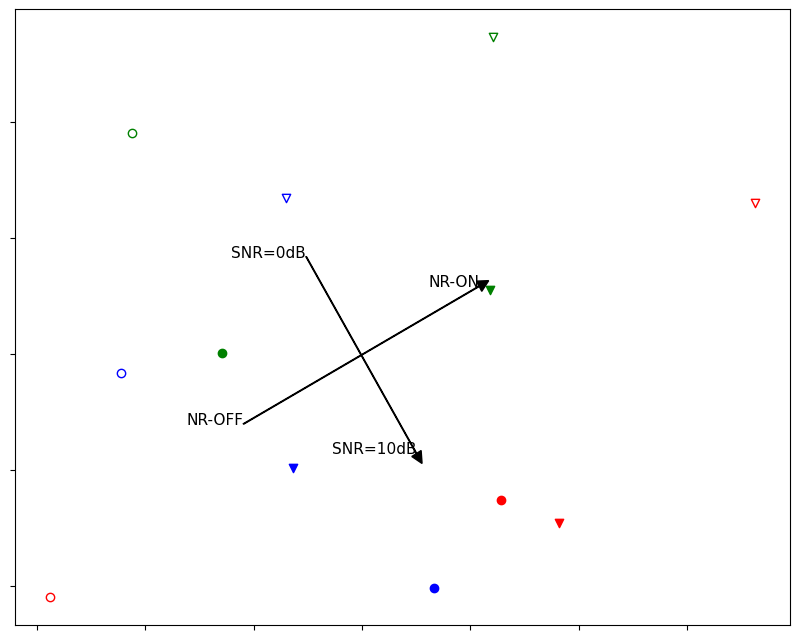

In [14]:


# Create a DataFrame to store point characteristics
characteristics = {
    'Point': range(12),
    'Category': ['NC-off', 'NC-off', 'NC-off', 'NC-off', 'NC-off', 'NC-off', 'NC-on', 'NC-on', 'NC-on', 'NC-on', 'NC-on', 'NC-on'],
    'SNR': [0, 0, 0, 10, 10, 10, 0, 0, 0, 10, 10, 10],
    'Type': ['F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS', 'F-M', 'F-S', 'S-MS']
}

characteristics_df = pd.DataFrame(characteristics)

# Initialize MDS for 2D projection
mds_2d = MDS(n_components=2,
    metric=False,
    max_iter=8000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=42,
    n_jobs=-1,
    n_init=1000,
    normalized_stress="auto")

# Fit the data and obtain the 2D projection
proj_2d = mds_2d.fit_transform(D)

# Create a color map for the different types
type_colors = {'F-M': 'red', 'F-S': 'green', 'S-MS': 'blue'}

# Create markers based on Category and SNR
markers = {
    ('NC-off', 0): 'o',  # Triangle marker
    ('NC-on', 0): 'v',   # Triangle marker
    ('NC-off', 10): 'o',  # Circle marker
    ('NC-on', 10): 'v'   # Circle marker
}

# Create a figure and axes for the 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# To remove x-axis tick labels
ax.set_xticklabels([])

# To remove y-axis tick labels
ax.set_yticklabels([])
for index, row in characteristics_df.iterrows():
    category = row['Category']
    snr = row['SNR']
    type = row['Type']
    
    marker = markers.get((category, snr), 'o')  # Default to circle marker
    color = type_colors[type]

    # If SNR type, use an empty marker
    if snr > 0:
        
        plt.scatter(proj_2d[index, 0], proj_2d[index, 1], c=color, marker=marker, label=f'{category} - {type}')
    else:
        plt.scatter(proj_2d[index, 0], proj_2d[index, 1], edgecolor=color, marker=marker, facecolors='white', label=f'{category} - {type}')

# Center of mass for NR Off
triangle_com = proj_2d[0:6].mean(axis=0)
# Center of mass for NR On
circle_com = proj_2d[6:].mean(axis=0)

# Center of mass for SNR=0
empty_com = proj_2d[[0,1,2,6,7,8],:].mean(axis=0)
# Center of mass for SNR=10
filled_com = proj_2d[[3,4,5,9,10,11],:].mean(axis=0)


# Calculate the arrow positions
x1, y1 = triangle_com
x2, y2 = circle_com
x3, y3 = empty_com
x4, y4 = filled_com

# Create a scatter plot with points
#plt.scatter([x1, x2, x3, x4], [y1, y2, y3, y4], marker='*', color='black', label='Center of Mass')

# Add arrows from triangle_com to circle_com and from empty_com to filled_com
plt.arrow(x1, y1, x2 - x1, y2 - y1, head_width=0.02, head_length=0.02, fc='black', ec='black', label='Arrow 1')
plt.arrow(x3, y3, x4 - x3, y4 - y3, head_width=0.02, head_length=0.02, fc='black', ec='black', label='Arrow 2')

# Add labels for the points
plt.text(x1, y1, 'NR-OFF', fontsize=11, ha='right')
plt.text(x2, y2, 'NR-ON', fontsize=11, ha='right')
plt.text(x3, y3, 'SNR=0dB', fontsize=11, ha='right')
plt.text(x4, y4, 'SNR=10dB', fontsize=11, ha='right')


plt.show()


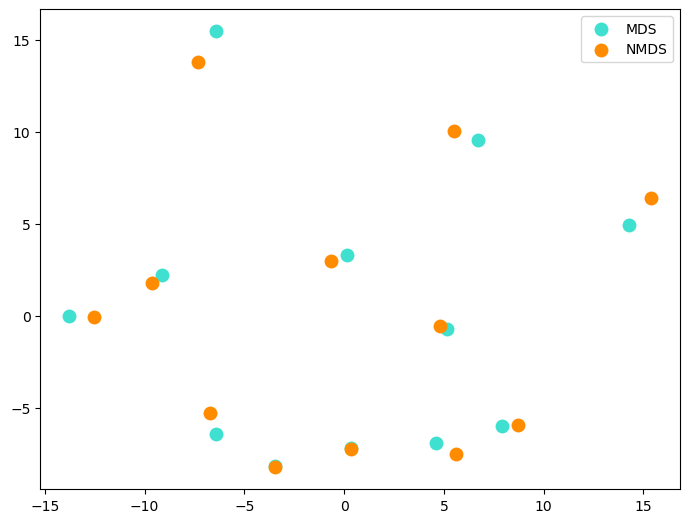

In [158]:

mds = manifold.MDS(
    n_components=2,
    max_iter=3000,
    eps=1e-9,
    random_state=seed,
    dissimilarity="precomputed",
    n_jobs=1,
    normalized_stress="auto",
)
pos = mds.fit(D).embedding_

nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=seed,
    n_jobs=1,
    n_init=1,
    normalized_stress="auto",
)
npos = nmds.fit_transform(D, init=pos)

# Rescale the data
pos *= np.sqrt((X_true**2).sum()) / np.sqrt((pos**2).sum())
npos *= np.sqrt((X_true**2).sum()) / np.sqrt((npos**2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0.0, 0.0, 1.0, 1.0])

s = 100

plt.scatter(pos[:, 0], pos[:, 1], color="turquoise", s=s, lw=0, label="MDS")
plt.scatter(npos[:, 0], npos[:, 1], color="darkorange", s=s, lw=0, label="NMDS")
plt.legend(scatterpoints=1, loc="best", shadow=False)

similarities = D.max() / (D + EPSILON) * 100
np.fill_diagonal(D, 0)
# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)


plt.show()

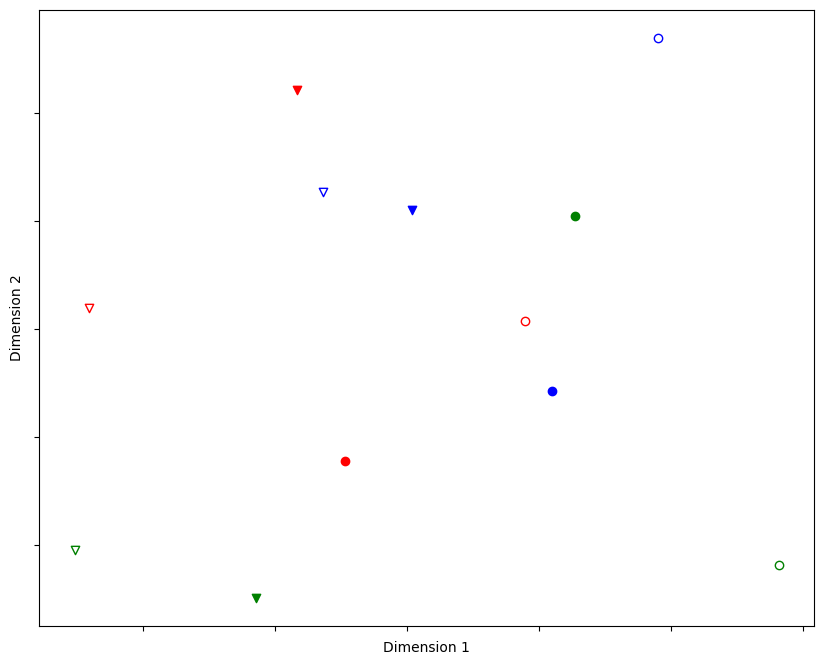

In [12]:

# Create a color map for the different types
type_colors = {'F-M': 'red', 'F-S': 'green', 'S-MS': 'blue'}

# Create markers based on Category and SNR
markers = {
    ('NC-off', 0): 'o',  # Triangle marker
    ('NC-on', 0): 'v',   # Triangle marker
    ('NC-off', 10): 'o',  # Circle marker
    ('NC-on', 10): 'v'   # Circle marker
}

# Create a figure and axes for the 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# To remove x-axis tick labels
ax.set_xticklabels([])

# To remove y-axis tick labels
ax.set_yticklabels([])
for index, row in characteristics_df.iterrows():
    category = row['Category']
    snr = row['SNR']
    type = row['Type']
    
    marker = markers.get((category, snr), 'o')  # Default to circle marker
    color = type_colors[type]

    # If SNR type, use an empty marker
    if snr > 0:
        
        plt.scatter(pos[index, 0], proj_2d[index, 1], c=color, marker=marker, label=f'{category} - {type}')
    else:
        plt.scatter(pos[index, 0], proj_2d[index, 1], edgecolor=color, marker=marker, facecolors='white', label=f'{category} - {type}')

# Center of mass for NR Off
triangle_com = pos[0:6].mean(axis=0)
# Center of mass for NR On
circle_com = pos[6:].mean(axis=0)

# Center of mass for SNR=0
empty_com = pos[[0,1,2,6,7,8],:].mean(axis=0)
# Center of mass for SNR=10
filled_com = pos[[3,4,5,9,10,11],:].mean(axis=0)


# Draw an arrow from triangle_com to circle_com
arrow_props = dict(arrowstyle='-|>', color='black', lw=1.5)
ax.annotate('NR effect', xy=circle_com, xytext=triangle_com, arrowprops=arrow_props)
ax.annotate('SNR effect', xy=empty_com, xytext=filled_com, arrowprops=arrow_props)


plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.show()

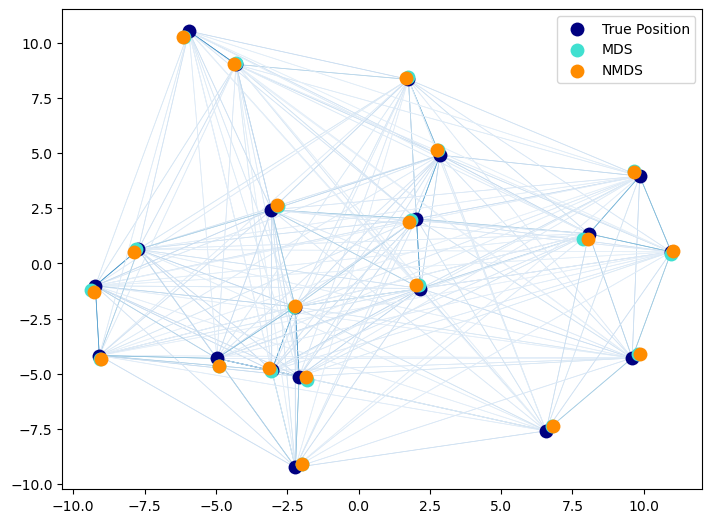

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances

EPSILON = np.finfo(np.float32).eps
n_samples = 20
seed = np.random.RandomState(seed=3)
X_true = seed.randint(0, 20, 2 * n_samples).astype(float)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
similarities += noise

mds = manifold.MDS(
    n_components=2,
    max_iter=3000,
    eps=1e-9,
    random_state=seed,
    dissimilarity="precomputed",
    n_jobs=1,
    normalized_stress="auto",
)
pos = mds.fit(similarities).embedding_

nmds = manifold.MDS(
    n_components=2,
    metric=False,
    max_iter=3000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=seed,
    n_jobs=1,
    n_init=1,
    normalized_stress="auto",
)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true**2).sum()) / np.sqrt((pos**2).sum())
npos *= np.sqrt((X_true**2).sum()) / np.sqrt((npos**2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(1)
ax = plt.axes([0.0, 0.0, 1.0, 1.0])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color="navy", s=s, lw=0, label="True Position")
plt.scatter(pos[:, 0], pos[:, 1], color="turquoise", s=s, lw=0, label="MDS")
plt.scatter(npos[:, 0], npos[:, 1], color="darkorange", s=s, lw=0, label="NMDS")
plt.legend(scatterpoints=1, loc="best", shadow=False)

similarities = similarities.max() / (similarities + EPSILON) * 100
np.fill_diagonal(similarities, 0)
# Plot the edges
start_idx, end_idx = np.where(pos)
# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [
    [X_true[i, :], X_true[j, :]] for i in range(len(pos)) for j in range(len(pos))
]
values = np.abs(similarities)
lc = LineCollection(
    segments, zorder=0, cmap=plt.cm.Blues, norm=plt.Normalize(0, values.max())
)
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)

plt.show()

In [8]:
print(similarities)

[[ 0.          3.60555128 11.40175425  6.08276253  3.         13.45362405
  11.40175425  7.07106781  8.24621125  9.21954446 11.18033989 11.40175425
   8.54400375 15.          6.32455532 13.03840481 10.44030651 15.03329638
   6.40312424 12.08304597]
 [ 3.60555128  0.         14.86606875  9.48683298  6.32455532 14.4222051
  14.03566885  9.21954446  6.08276253 12.08304597 14.         12.20655562
  11.04536102 16.55294536  9.43398113 16.64331698  8.         18.02775638
   7.61577311 14.31782106]
 [11.40175425 14.86606875  0.          8.06225775  9.8488578  19.10497317
  12.64911064  8.24621125 19.23538406  5.         11.70469991 18.
  12.04159458 18.68154169  5.83095189  4.47213595 21.47091055 12.80624847
  14.31782106 14.56021978]
 [ 6.08276253  9.48683298  8.06225775  0.          3.16227766 11.40175425
   6.40312424  9.21954446 12.04159458  8.94427191  5.83095189 10.04987562
   4.47213595 11.66190379  6.40312424  7.81024968 14.2126704   9.21954446
   6.32455532  7.81024968]
 [ 3.        

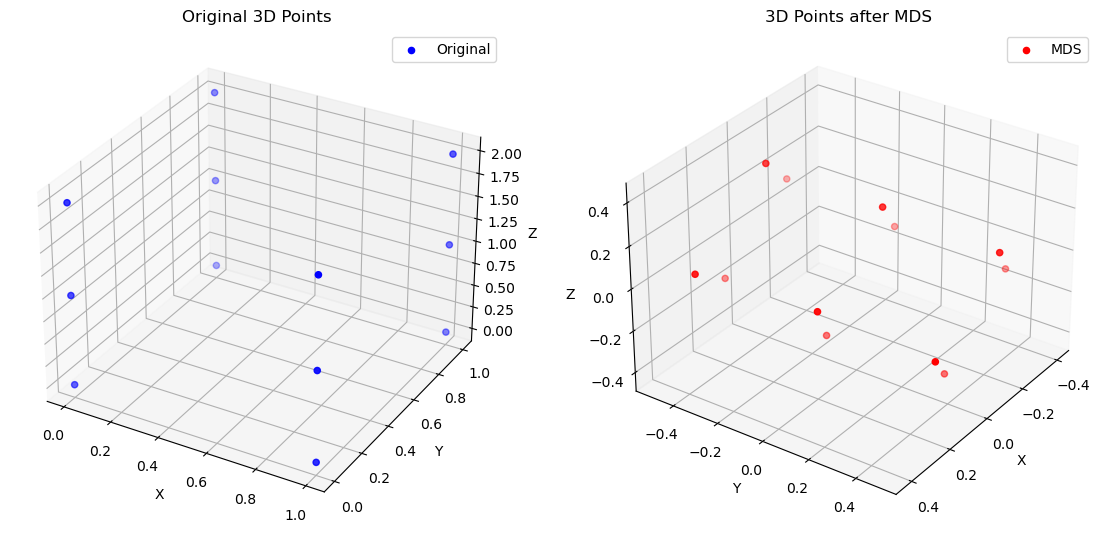

In [28]:

# Define the 12 points as specified
points = np.array([
    (0, 0, 0), (0, 0, 1), (0, 0, 2),
    (1, 0, 0), (1, 0, 1), (1, 0, 2),
    (0, 1, 0), (0, 1, 1), (0, 1, 2),
    (1, 1, 0), (1, 1, 1), (1, 1, 2)
])

# Compute the similarity (distance) matrix
def compute_distances(pts):
    num_pts = len(pts)
    distances = np.zeros((num_pts, num_pts))
    for i in range(num_pts):
        for j in range(num_pts):
            # Euclidean distance
            distances[i, j] = np.linalg.norm(pts[i] - pts[j])
    return distances

similarity_matrix = compute_distances(points)

# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=3,
    metric=False,
    max_iter=1000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=42,
    n_jobs=-1,
    n_init=1000,
    normalized_stress="auto")
mds_fit = mds.fit_transform(similarity_matrix)

# Visualize the original points and the points after MDS in 3D
fig = plt.figure(figsize=(14, 7))

# Original points
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Original')
ax1.set_title('Original 3D Points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# Points after MDS
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(mds_fit[:, 0], mds_fit[:, 1], mds_fit[:, 2], c='red', label='MDS')
ax2.set_title('3D Points after MDS')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.view_init(elev=30, azim=35)  # Set the same initial viewing angle for the MDS plot

ax2.legend()

In [39]:
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data from the table
data = {
    'WDRC_F-M': [0.060839044, 0.176040169],
    'WDRC_F-S': [0.078792288, 0.176736005],
    'WDRC_S-MS': [0.046033974, 0.125497004],
    'WDRC+NR_F-M': [0.062454168, 0.169550819],
    'WDRC+NR_F-S': [0.121783361, 0.239595619],
    'WDRC+NR_S-MS': [0.035534829, 0.099855163]
}

# Convert to a DataFrame
df = pd.DataFrame(data, index=['SNR=0', 'SNR=10'])
print(df)
# Flatten the DataFrame to get the scores as a list
scores = df.values.flatten()

# Calculate the dissimilarity matrix
n = len(scores)
dissimilarity_matrix = np.zeros((n, n))

# Subtract each score from every other score to get the dissimilarity
for i in range(n):
    for j in range(n):
        dissimilarity_matrix[i, j] = np.abs(scores[i] - scores[j])

# Apply Multidimensional Scaling (MDS)
print(dissimilarity_matrix)
# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=2,
    metric=False,
    max_iter=1000,
    eps=1e-12,
    dissimilarity="precomputed",
    random_state=42,
    n_jobs=-1,
    n_init=1000,
    normalized_stress="auto")
mds_fit = mds.fit_transform(dissimilarity_matrix)

# Visualize the points after MDS in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='2d')
ax.scatter(mds_fit[:, 0], mds_fit[:, 1])

ax.set_title('3D Points after MDS')
ax.set_xlabel('MDS Dimension 1')
ax.set_ylabel('MDS Dimension 2')


# Annotate the points with the condition names
conditions = [f"{cond}_{snr}" for cond in df.columns for snr in df.index]
for i, txt in enumerate(conditions):
    ax.text(mds_fit[i, 0], mds_fit[i, 1], txt, size=10, zorder=1)

plt.show()


        WDRC_F-M  WDRC_F-S  WDRC_S-MS  WDRC+NR_F-M  WDRC+NR_F-S  WDRC+NR_S-MS
SNR=0       0.06      0.08       0.05         0.06         0.12          0.04
SNR=10      0.18      0.18       0.13         0.17         0.24          0.10
[[0.         0.01795324 0.01480507 0.00161512 0.06094432 0.02530422
  0.11520112 0.11589696 0.06465796 0.10871177 0.17875658 0.03901612]
 [0.01795324 0.         0.03275831 0.01633812 0.04299107 0.04325746
  0.09724788 0.09794372 0.04670472 0.09075853 0.16080333 0.02106287]
 [0.01480507 0.03275831 0.         0.01642019 0.07574939 0.01049915
  0.13000619 0.13070203 0.07946303 0.12351684 0.19356165 0.05382119]
 [0.00161512 0.01633812 0.01642019 0.         0.05932919 0.02691934
  0.113586   0.11428184 0.06304284 0.10709665 0.17714145 0.03740099]
 [0.06094432 0.04299107 0.07574939 0.05932919 0.         0.08624853
  0.05425681 0.05495264 0.00371364 0.04776746 0.11781226 0.0219282 ]
 [0.02530422 0.04325746 0.01049915 0.02691934 0.08624853 0.
  0.14050534 0.141201

ValueError: Unknown projection '2d'

<Figure size 640x480 with 0 Axes>